# Вернемся к Matlab/Octave (Занятие 3_1 в Jupyter)

In [1]:
close all
clear all

In [2]:
% octave specific function
pkg load netcdf
pkg load io
pkg load statistics

In [3]:
fname4='/home/mizyuk/DataW2/AO_MexicanGulf_by_Dop5/SST_Reinolds_7D_AO_MexicanGulf_all_auto.mat.nc'; % имя файла

In [4]:
ncinfo(fname4) % инфо к nc файлу

ans =

  scalar structure containing the fields:

    Filename = /home/mizyuk/DataW2/AO_MexicanGulf_by_Dop5/SST_Reinolds_7D_AO_MexicanGulf_all_auto.mat.nc
    Name = /
    Dimensions =

      1x3 struct array containing the fields:

        Name
        Length
        Unlimited

    Variables =

      1x4 struct array containing the fields:

        Name
        Dimensions
        Size
        Datatype
        Attributes
        ChunkSize
        FillValue
        DeflateLevel
        Shuffle
        Checksum

    Attributes =

      1x5 struct array containing the fields:

        Name
        Value

    Groups = [](0x0)
    Format = netcdf4



загружаем перменные

In [5]:
x=ncread(fname4,'lon'); % долгота
y=ncread(fname4,'lat'); % широта
d=ncread(fname4,'time'); % дата
aa=ncread(fname4,'aa'); % массив температуры

In [6]:
size(aa)

ans =

    56    72   476



In [7]:
aa(aa==0)=nan; % 0all zeros to Nan (Not A Number)

In [8]:
picdir='Results/SST_Reinolds_7D/'; % название директории
mkdir(picdir) % создаем директорию

ans = 1


In [9]:
%% среднее за выбранный год
dv=datevec(d); % дата переводится в вектор (год, месяц, число, день, час, минута)
year=dv(:,1); % год

yu1=2013; % будем строить за 2013

inye=find(year==yu1); % ищем индекс даты год которой равен 2013
aa1=aa(:,:,inye); % выбираем только эти индексы

aam=nanmean(aa1,3); % среднее по времени (3-ая размерность)

In [10]:
aam(aam<1)=nan;

In [11]:
print?

'print' is a function from the file /usr/share/octave/4.2.2/m/plot/util/print.m

 -- print ()
 -- print (OPTIONS)
 -- print (FILENAME, OPTIONS)
 -- print (H, FILENAME, OPTIONS)
     Print a plot, or save it to a file.

     Both output formatted for printing (PDF and PostScript), and many
     bitmapped and vector image formats are supported.

     FILENAME defines the name of the output file.  If the filename has
     no suffix, one is inferred from the specified device and appended
     to the filename.  If no filename is specified, the output is sent
     to the printer.

     H specifies the handle of the figure to print.  If no handle is
     specified the current figure is used.

     For output to a printer, PostScript file, or PDF file, the paper
     size is specified by the figure's 'papersize' property.  The
     location and size of the image on the page are specified by the
     figure's 'paperposition' property.  The orientation of the page is
     specified by the figure

c = -7.9522
Some output formats are not available.
    __print_parse_opts__ at line 388 column 9
    print at line 316 column 8


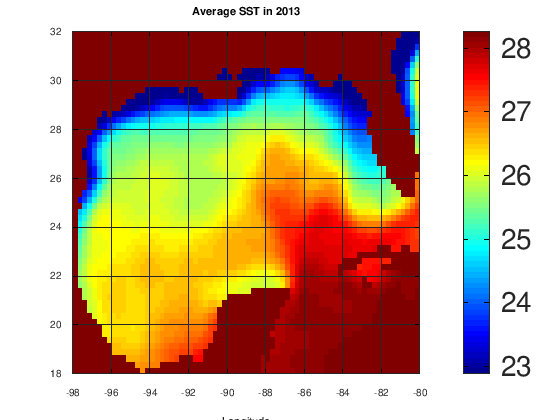

In [12]:
% рисуем
figure
axes('fontsize',18)
% contourf(x,y,aam,30) % 1 контур
imagesc(x,y,aam) % 2 рисунок
% imagescn(x,y,aam) % 3 без нанов
axis xy
c=colorbar('fontsize',28)
xlabel('Longitude')
%ylabel
title('Average SST in 2013')
grid on
colormap(jet)
c1=prctile(aam(:),3); % автоподбор по шкале
c2=prctile(aam(:),97); % автоподбор по шкале
caxis([c1 c2])% ограничение шкалы
savname='SST_Reinolds_7D_year2013.jpeg'; % имя рисунка
print(gcf,'-r150','-djpeg',[picdir savname]) % сохраняем рисунок

In [13]:
shading?

'shading' is a function from the file /usr/share/octave/4.2.2/m/plot/appearance/shading.m

 -- shading (TYPE)
 -- shading (HAX, TYPE)
     Set the shading of patch or surface graphic objects.

     Valid arguments for TYPE are

     "flat"
          Single colored patches with invisible edges.

     "faceted"
          Single colored patches with black edges.

     "interp"
          Colors between patch vertices are interpolated and the patch
          edges are invisible.

     If the first argument HAX is an axes handle, then plot into this
     axes, rather than the current axes returned by 'gca'.

     See also: fill, mesh, patch, pcolor, surf, surface, hidden,
     lighting.

Additional help for built-in functions and operators is
available in the online version of the manual.  Use the command
'doc <topic>' to search the manual index.

Help and information about Octave is also available on the WWW
at http://www.octave.org and via the help@octave.org
mailing list.


c = -7.1088


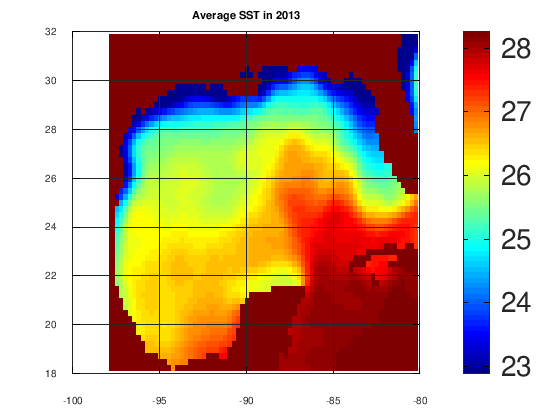

In [14]:
% рисуем
figure
axes('fontsize',18)
% contourf(x,y,aam,30) % 1 контур
% imagesc(x,y,aam) % 2 рисунок
pcolor(x,y,aam) % 2 рисунок
shading('flat')
% imagescn(x,y,aam) % 3 без нанов
axis xy
c=colorbar('fontsize',28)
xlabel('Longitude')
%ylabel
title('Average SST in 2013')
grid on
colormap(jet)
c1=prctile(aam(:),3); % автоподбор по шкале
c2=prctile(aam(:),97); % автоподбор по шкале
caxis([c1 c2])% ограничение шкалы
savname='SST_Reinolds_7D_year2013_pcolor.jpeg'; % имя рисунка
% print(gcf,'-r150','-djpeg',[picdir savname]) % сохраняем рисунок